In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:00<00:00, 171MB/s]
100% 163M/163M [00:00<00:00, 173MB/s]


In [6]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [7]:
!ls

data  face-mask-dataset.zip  sample_data


In [8]:
import os  # Pour gérer les interactions avec le système d'exploitation (fichiers, répertoires, etc.)
import numpy as np  # Pour le calcul numérique et la manipulation de tableaux multidimensionnels
import matplotlib.pyplot as plt  # Pour tracer des graphiques et visualiser des données
import matplotlib.image as mpimg  # Pour lire et afficher des images avec Matplotlib
import cv2  # Pour le traitement d'images et de vidéos avec OpenCV
from google.colab.patches import cv2_imshow  # Pour afficher des images OpenCV dans un notebook Google Colab
from PIL import Image  # Pour ouvrir, manipuler et sauvegarder des fichiers d'images
from sklearn.model_selection import train_test_split  # Pour diviser un jeu de données en ensembles d'entraînement et de test

In [9]:
# Liste les fichiers dans le dossier spécifié
with_mask_files = os.listdir('/content/data/with_mask')

In [10]:
without_mask_files = os.listdir('/content/data/without_mask')

In [11]:
print(len(with_mask_files))

3725


In [12]:
print(len(without_mask_files))

3828


**Creating Labels for the two class of Images**

In [13]:
# Crée une liste de 3725 éléments, tous égaux à 1. Cette liste représente (labels) pour des données associées à des images "avec masque".
with_mask_labels = [1]*3725
print(with_mask_labels[0:12])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
# Crée une liste de 3828 éléments, tous égaux à 1. Cette liste représente (labels) pour des données associées à des images "sans masque".
without_mask_labels = [0]*3828
print(without_mask_labels[0:12])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


**Displaying the Images**

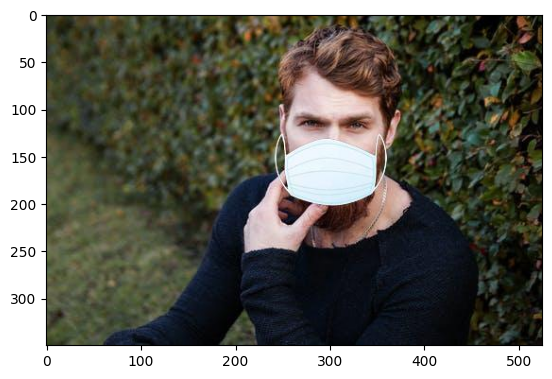

In [16]:
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')  # Lit l'image depuis le chemin
imgplot = plt.imshow(img)  # Prépare l'affichage de l'image
plt.show()  # Affiche l'image

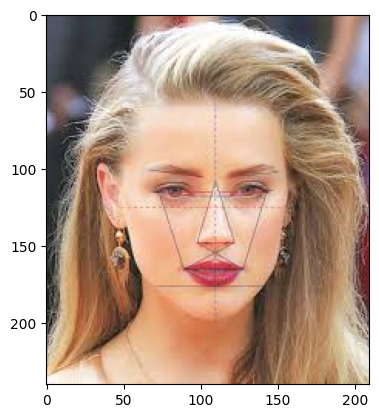

In [17]:
img = mpimg.imread('/content/data/without_mask/without_mask_2926.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images
2. Convert the images to numpy arrays

In [18]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       [[251, 251, 251],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [250, 250, 250],
        [250, 250, 250],
        [250, 250, 250]],

       ...,

       [[230, 230, 230],
        [227, 227, 227],
        [225, 225, 225],
        ...,
        [230, 230, 232],
        [230, 230, 232],
        [230, 230, 232]],

       [[230, 229, 229],
        [229, 228, 229],
        [228, 227, 228],
        ...,
        [232, 232, 234],
        [232, 232, 234],
        [232, 232, 234]],

       [[229, 227, 228],
        [230, 228, 229],
        [230, 228, 229],
        ...,
        [233, 233, 235],
        [233, 233, 235],
        [234, 234, 236]]], dtype=uint8)
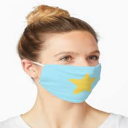

In [19]:
data[8]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
X = np.array(data)
Y = np.array(labels)

In [22]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [26]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

**Building a convolutional Neural Networks (CNN)**

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 138s 797ms/step - acc: 0.6720 - loss: 0.6086 - val_acc: 0.8661 - val_loss: 0.3151
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 131s 771ms/step - acc: 0.8764 - loss: 0.3003 - val_acc: 0.8413 - val_loss: 0.4148
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 779ms/step - acc: 0.8981 - loss: 0.2509 - val_acc: 0.8711 - val_loss: 0.3083
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 784ms/step - acc: 0.9110 - loss: 0.2227 - val_acc: 0.8860 - val_loss: 0.2632
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 146s 810ms/step - acc: 0.9288 - loss: 0.1832 - val_acc: 0.9140 - val_loss: 0.2782


In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - acc: 0.9203 - loss: 0.2274
Test Accuracy = 0.9232296347618103


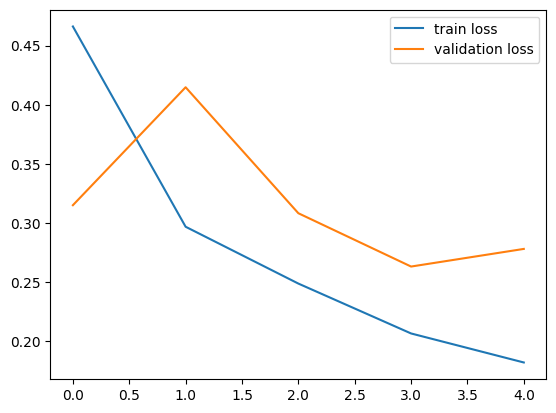

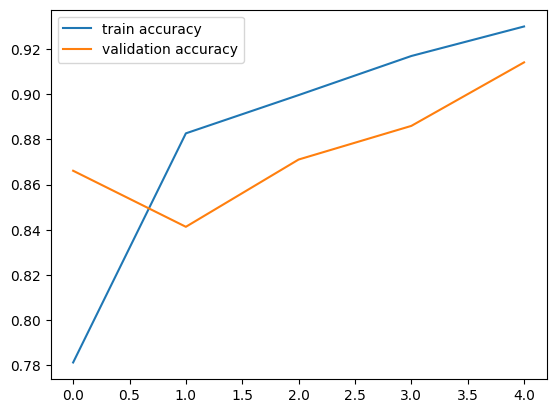

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test1.jfif


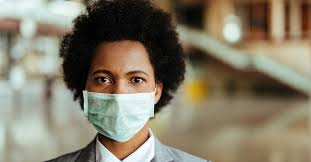

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.30429667 0.67419636]]
1
The person in the image is wearing a mask


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without1.jfif


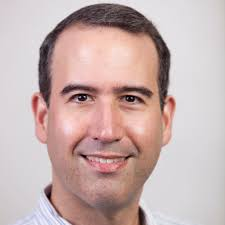

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[0.5108023 0.4918959]]
0
The person in the image is not wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')\